|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

# Q1: Import labraries

In [24]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Q2: Read instagram_users.csv file

In [25]:
df=pd.read_csv('instagram_users.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64244 entries, 0 to 64243
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0    Num_posts               64244 non-null  int64  
 1   Num_following            64244 non-null  int64  
 2   Num_followers            64244 non-null  int64  
 3   Biography_length         64244 non-null  int64  
 4   Picture_availability     64244 non-null  int64  
 5   Link_availability        64244 non-null  int64  
 6   Average_caption_length   64244 non-null  int64  
 7   Caption_zero             64244 non-null  float64
 8   Non_image_percentage     64244 non-null  float64
 9   Engagement_rate_like     64244 non-null  float64
 10  Engagement_rate_comment  64244 non-null  float64
 11  Location_tag_percentage  64244 non-null  float64
 12  Average_hashtag_count    64244 non-null  float64
 13  Promotional_keywords     64244 non-null  float64
 14  Followers_keywords    

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64244 entries, 0 to 64243
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0    Num_posts               64244 non-null  int64  
 1   Num_following            64244 non-null  int64  
 2   Num_followers            64244 non-null  int64  
 3   Biography_length         64244 non-null  int64  
 4   Picture_availability     64244 non-null  int64  
 5   Link_availability        64244 non-null  int64  
 6   Average_caption_length   64244 non-null  int64  
 7   Caption_zero             64244 non-null  float64
 8   Non_image_percentage     64244 non-null  float64
 9   Engagement_rate_like     64244 non-null  float64
 10  Engagement_rate_comment  64244 non-null  float64
 11  Location_tag_percentage  64244 non-null  float64
 12  Average_hashtag_count    64244 non-null  float64
 13  Promotional_keywords     64244 non-null  float64
 14  Followers_keywords    

# Q3: Split tha dataset into training and testing

In [28]:
df.replace({'real':1},inplace=True)
df.replace({'fake':0},inplace=True)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64244 entries, 0 to 64243
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0    Num_posts               64244 non-null  int64  
 1   Num_following            64244 non-null  int64  
 2   Num_followers            64244 non-null  int64  
 3   Biography_length         64244 non-null  int64  
 4   Picture_availability     64244 non-null  int64  
 5   Link_availability        64244 non-null  int64  
 6   Average_caption_length   64244 non-null  int64  
 7   Caption_zero             64244 non-null  float64
 8   Non_image_percentage     64244 non-null  float64
 9   Engagement_rate_like     64244 non-null  float64
 10  Engagement_rate_comment  64244 non-null  float64
 11  Location_tag_percentage  64244 non-null  float64
 12  Average_hashtag_count    64244 non-null  float64
 13  Promotional_keywords     64244 non-null  float64
 14  Followers_keywords    

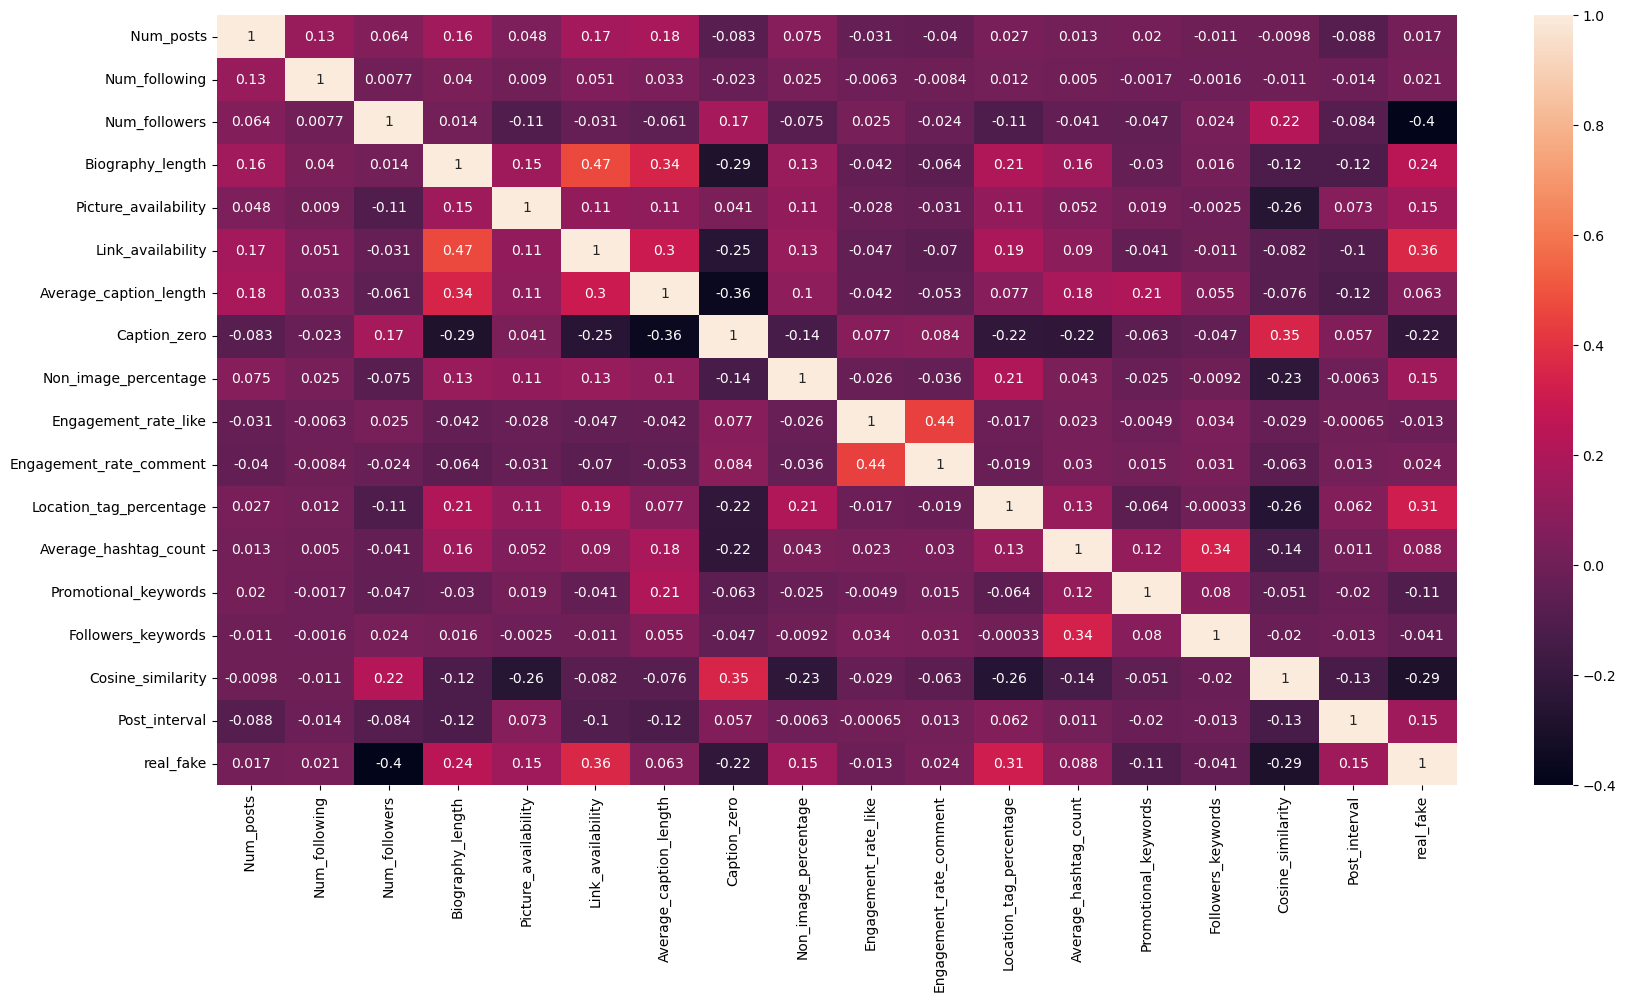

In [30]:
plt.figure(figsize=(20,10));
sns.heatmap(df.corr(),annot=True);

In [31]:
X=df[[' Num_posts',
 'Num_following',
 'Num_followers',
 'Biography_length',
 'Picture_availability',
 'Link_availability',
 'Average_caption_length',
 'Caption_zero',
 'Non_image_percentage',
 'Engagement_rate_like',
 'Engagement_rate_comment',
 'Location_tag_percentage',
 'Average_hashtag_count',
 'Promotional_keywords',
 'Followers_keywords',
 'Cosine_similarity',
 'Post_interval',]]

y=df['real_fake']

In [32]:
X_train , X_test , y_train , y_test=train_test_split(X,y,test_size=0.2)

# Q4: Build three machine models 

## Q4.1: The first machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

## Decision Tree Classifier

In [33]:
dtree=DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [34]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
predictions = dtree.predict(X_test)

In [36]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.84      0.85      0.85      6283
           1       0.86      0.84      0.85      6566

    accuracy                           0.85     12849
   macro avg       0.85      0.85      0.85     12849
weighted avg       0.85      0.85      0.85     12849



In [37]:
print(accuracy_score(y_test,predictions))

0.8469919838119698


In [38]:
print(confusion_matrix(y_test,predictions))


[[5365  918]
 [1048 5518]]


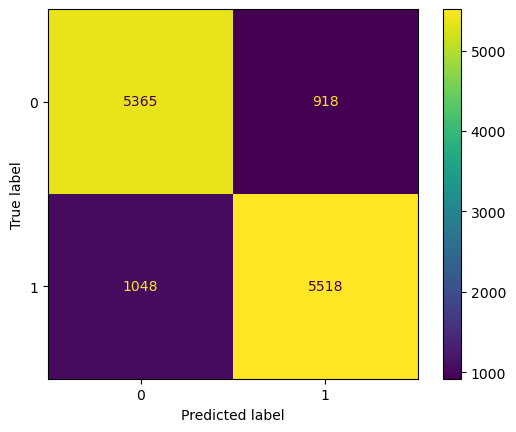

In [39]:
plot_confusion_matrix(dtree, X_test, y_test)  
plt.show()

## Q4.2: The second machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

## Random Forest Classifier

In [40]:
rfc = RandomForestClassifier(n_estimators=100) #n_estimators: The number of trees in the forest.
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
rfc_pred = rfc.predict(X_test)

In [42]:
print(confusion_matrix(y_test,rfc_pred))

[[5268 1015]
 [ 295 6271]]


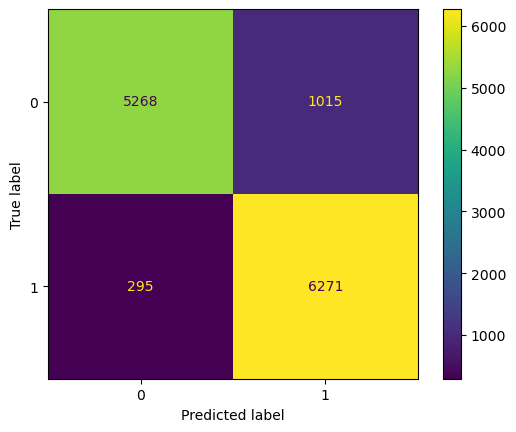

In [46]:
plot_confusion_matrix(rfc,X_test,y_test)
plt.show()

In [44]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      6283
           1       0.86      0.96      0.91      6566

    accuracy                           0.90     12849
   macro avg       0.90      0.90      0.90     12849
weighted avg       0.90      0.90      0.90     12849



In [45]:
print(accuracy_score(y_test,predictions))

0.8469919838119698


## Q4.3: The third machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [23]:
# write your code here ^_^